In [182]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn

# Grafo Lima

In [129]:
%%time
place_name = "Lima, Peru"
graph = ox.graph_from_place(place_name, which_result=3, network_type='drive')

CPU times: user 2min 29s, sys: 2.05 s, total: 2min 31s
Wall time: 2min 31s


In [135]:
print(nx.info(graph))

Name: 
Type: MultiDiGraph
Number of nodes: 123937
Number of edges: 332490
Average in degree:   2.6827
Average out degree:   2.6827


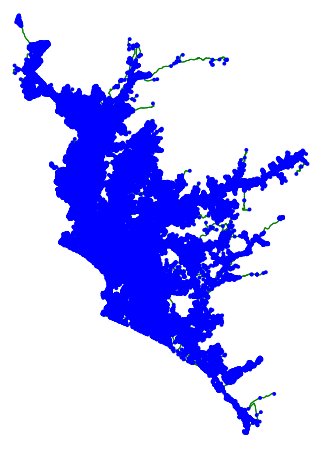

In [136]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green')

In [137]:
nodes, edges = ox.graph_to_gdfs(graph)

In [138]:
nodes.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
258066779,-12.371160,-76.784901,45A,motorway_junction,3,POINT (-76.78490 -12.37116)
258066780,-12.376522,-76.779354,NaN,NaN,3,POINT (-76.77935 -12.37652)
258066781,-12.384553,-76.771046,NaN,NaN,3,POINT (-76.77105 -12.38455)
258066783,-12.385783,-76.769768,NaN,NaN,3,POINT (-76.76977 -12.38578)
258067237,-12.304254,-76.840727,NaN,NaN,3,POINT (-76.84073 -12.30425)


# Rutas transporte

In [22]:
df = pd.read_csv("rutas/Rutas_COSAC_I.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
rutascosac = gpd.GeoDataFrame(df, crs='epsg:4326')

In [185]:
rutascosac

,name,geometry,geometry_layer,geometry_proj4
0,AC01_1,"LINESTRING Z (-77.03617 -12.05802 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
1,AC01_2,"LINESTRING Z (-77.01276 -12.06242 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
2,AN01_1,"LINESTRING Z (-77.05891 -11.98019 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
3,AN01_2,"LINESTRING Z (-77.03804 -11.97890 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
4,AN02_1,"LINESTRING Z (-77.05891 -11.98019 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...
849,LOS JAZMINES (Emb.N°2),POINT Z (-77.05479 -12.00197 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs
850,INDEPENDENCIA (Emb.N°2),POINT Z (-77.05525 -11.99833 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs
851,PACIFICO (Emb.N°2),POINT Z (-77.05618 -11.99460 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs
852,IZAGUIRRE (Emb.N°2),POINT Z (-77.05701 -11.98946 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs


<AxesSubplot:>

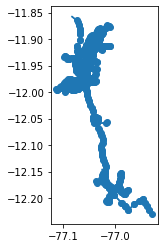

In [131]:
rutascosac.plot()

In [26]:
df = pd.read_csv("rutas/Rutas_Corredores_Complementarios.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
rutascorredores = gpd.GeoDataFrame(df, crs='epsg:4326')

In [186]:
rutascorredores

,name,geometry,geometry_layer,geometry_proj4
0,VUELTA,"LINESTRING Z (-77.08706 -11.97458 0.00000, -77...",Rutas,+proj=longlat +datum=WGS84 +no_defs
1,IDA,"LINESTRING Z (-77.08699 -11.97281 0.00000, -77...",Rutas,+proj=longlat +datum=WGS84 +no_defs
2,Layover Norte - Sur,"LINESTRING Z (-77.08720 -11.97442 0.00000, -77...",Rutas,+proj=longlat +datum=WGS84 +no_defs
3,Layover Sur - Norte,"LINESTRING Z (-76.92961 -12.22993 0.00000, -76...",Rutas,+proj=longlat +datum=WGS84 +no_defs
4,Proceres,POINT Z (-76.98355 -12.15259 0.00000),Vuelta,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...
1160,Puruchuco,POINT Z (-76.93523 -12.04235 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs
1161,Pista Nueva,POINT Z (-76.93227 -12.03887 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs
1162,Soldadura,POINT Z (-76.93099 -12.03742 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs
1163,Los Angeles,POINT Z (-76.92888 -12.03485 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs


<AxesSubplot:>

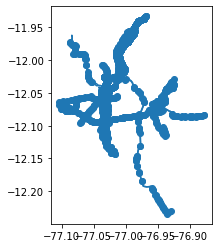

In [133]:
rutascorredores.plot()

In [51]:
df = pd.read_csv("rutas/Rutas_Transporte_Publico_Lima.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
rutastransportepublico = gpd.GeoDataFrame(df, crs='epsg:4326')

In [166]:
rutastransportepublico['ruta'] = rutastransportepublico['name'].apply(lambda x: str(x).split('_')[0])

In [201]:
rutastransportepublico2 = rutastransportepublico.dissolve(by='ruta').reset_index() #.plot(figsize = (35,35))
# rutastransportepublico.head()

In [202]:
rutastransportepublico2

,ruta,geometry,name,geometry_layer,geometry_proj4
0,1101,MULTILINESTRING Z ((-77.02704 -11.87652 0.0000...,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
1,1102,MULTILINESTRING Z ((-77.04456 -11.82879 0.0000...,1102_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
2,1103,MULTILINESTRING Z ((-77.00432 -11.85810 0.0000...,1103_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
3,1104,MULTILINESTRING Z ((-77.09005 -11.91961 0.0000...,1104_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
4,1105,MULTILINESTRING Z ((-77.05594 -11.86216 0.0000...,1105_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...,...
505,UCL-11,MULTILINESTRING Z ((-77.09643 -11.88544 0.0000...,UCL-11_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
506,UCL-12,MULTILINESTRING Z ((-77.11289 -12.07636 0.0000...,UCL-12_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
507,UCL-13,MULTILINESTRING Z ((-77.16800 -11.83161 0.0000...,UCL-13_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
508,UCL-14,MULTILINESTRING Z ((-77.14281 -12.06212 0.0000...,UCL-14_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs


<AxesSubplot:>

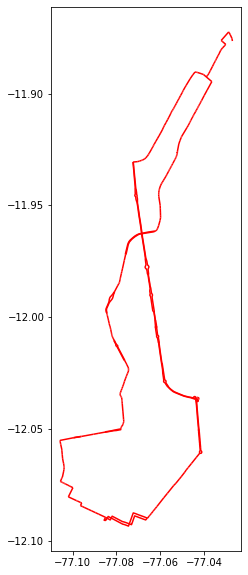

In [203]:
# cond = rutastransportepublico['ruta'].isin(['1101_Ida', '1101_Vuelta'])
cond = rutastransportepublico2['ruta'].isin(['1101'])
tmp = rutastransportepublico2[cond]
tmp.plot(color='red', figsize=(10,10))

In [204]:
tmp

,ruta,geometry,name,geometry_layer,geometry_proj4
0,1101,MULTILINESTRING Z ((-77.02704 -11.87652 0.0000...,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs


In [308]:
tmp

,ruta,geometry,name,geometry_layer,geometry_proj4
0,1101,MULTILINESTRING Z ((-77.02704 -11.87652 0.0000...,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs


In [192]:
tmp.dissolve()
# gdf['points'] = tmp.explode().apply(lambda x: [y for y in x['geometry'].coords], axis=1)

,geometry,name,geometry_layer,geometry_proj4,ruta
0,MULTILINESTRING Z ((-77.02704 -11.87652 0.0000...,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,1101


In [ ]:
%%time
rutastransportepublico2_points = gpd.overlay(edges, rutastransportepublico2, keep_geom_type=False)

In [219]:
nodes

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
258066779,-12.371160,-76.784901,45A,motorway_junction,3,POINT (-76.78490 -12.37116)
258066780,-12.376522,-76.779354,NaN,NaN,3,POINT (-76.77935 -12.37652)
258066781,-12.384553,-76.771046,NaN,NaN,3,POINT (-76.77105 -12.38455)
258066783,-12.385783,-76.769768,NaN,NaN,3,POINT (-76.76977 -12.38578)
258067237,-12.304254,-76.840727,NaN,NaN,3,POINT (-76.84073 -12.30425)
...,...,...,...,...,...,...
9753184691,-11.815096,-77.101528,NaN,NaN,3,POINT (-77.10153 -11.81510)
9753184707,-11.815352,-77.103018,NaN,NaN,3,POINT (-77.10302 -11.81535)
9753184714,-11.816139,-77.102029,NaN,NaN,4,POINT (-77.10203 -11.81614)


In [273]:
nodes.loc[[258066779]]

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
258066779,-12.37116,-76.784901,45A,motorway_junction,3,POINT (-76.78490 -12.37116)


In [293]:
edges[edges['osmid'] == 306752663]

,,,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,bridge,junction,tunnel,access,width,service
u,v,key,,,,,,,,,,,,,,,


In [301]:
res.astype({'osmid':str}).sort_values('osmid')

,osmid,oneway,lanes,highway,maxspeed,length,ref,name_1,bridge,junction,tunnel,access,width,service,ruta,name_2,geometry_layer,geometry_proj4,geometry
431,1007645172,True,2,secondary,50,69.535,NaN,Avenida Industrial,NaN,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.06164 -12.00412 0.00000)
6,1009013111,True,NaN,primary_link,NaN,15.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.04317 -12.04054 0.00000)
109,1013422274,True,3,primary,60,125.570,NaN,Avenida Alfonso Ugarte,NaN,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,"MULTIPOINT Z (-77.04249 -12.05111 0.00000, -77..."
443,1013422277,True,NaN,primary_link,40,11.880,NaN,Jirón Quilca,NaN,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,"MULTIPOINT Z (-77.04240 -12.05083 0.00000, -77..."
444,1013422278,True,NaN,busway,none,408.052,NaN,Metropolitano,NaN,NaN,NaN,no,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,"MULTIPOINT Z (-77.04242 -12.05098 0.00000, -77..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,"[660254537, 529387801, 660254538, 397012816]",True,NaN,primary,50,189.970,NaN,Avenida Universitaria,yes,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,"MULTIPOINT Z (-77.07833 -12.03432 0.00000, -77..."
648,"[681427360, 306754165, 681427359]",True,2,motorway,80,189.076,NaN,Vía Expresa Línea Amarilla,yes,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.04900 -12.03527 0.00000)
619,"[699950468, 699950469]",True,"[4, 3]",primary,60,32.174,NaN,Avenida Universitaria,NaN,NaN,NaN,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,"MULTIPOINT Z (-77.07156 -11.96385 0.00000, -77..."
684,"[745165965, 745165966, 745165967, 745165968, 7...",True,2,motorway_link,NaN,182.308,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,1101,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.04327 -12.03913 0.00000)


In [307]:
from shapely.geometry import Point

res2 = res.explode()
res2['isPoint'] = res2.apply(lambda x: type(x.geometry) is Point , axis=1)
# res2['isPoint'].unique()
res2

osmid  oneway lanes       highway maxspeed   length  ref  \
0   0  378149439    True     3       primary       40   74.956  NaN   
    1  378149439    True     3       primary       40   74.956  NaN   
1   0  378149439    True     3       primary       40   58.447  NaN   
    1  378149439    True     3       primary       40   58.447  NaN   
2   0  279007828    True   NaN  primary_link       40  182.992  NaN   
...          ...     ...   ...           ...      ...      ...  ...   
709 0  612096556   False   NaN     secondary      NaN   13.362  NaN   
710 0  612096556   False   NaN     secondary      NaN   13.362  NaN   
711 0  612096560   False   NaN     secondary      NaN   13.996  NaN   
712 0  612096560   False   NaN     secondary      NaN   13.996  NaN   
713 0  327439664    True   NaN     secondary       45   14.422  NaN   

                                   name_1 bridge    junction tunnel access  \
0   0                     Plaza 2 de Mayo    NaN  roundabout    NaN    NaN   
    1                     Plaza 2 de Mayo    NaN  roundabout    NaN    NaN   
1   0                     Plaza 2 de Mayo    NaN  roundabout    NaN    NaN   
    1                     Plaza 2 de Mayo    NaN  roundabout    NaN    NaN   
2   0              Avenida Alfonso Ugarte    NaN         NaN    NaN    NaN   
...                                   ...    ...         ...    ...    ...   
709 0                                 NaN    NaN         NaN    NaN    NaN   
710 0                                 NaN    NaN         NaN    NaN    NaN   
711 0                                 NaN    NaN         NaN    NaN    NaN   
712 0                                 NaN    NaN         NaN    NaN    NaN   
713 0  Avenida San Juan Bosco (Avenida U)    NaN         NaN    NaN    NaN   

      width service  ruta       name_2        geometry_layer  \
0   0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
    1   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
1   0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
    1   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
2   0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
...     ...     ...   ...          ...                   ...   
709 0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
710 0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
711 0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
712 0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   
713 0   NaN     NaN  1101  1101_Vuelta  Rtas_LimCal_30122021   

                            geometry_proj4  \
0   0  +proj=longlat +datum=WGS84 +no_defs   
    1  +proj=longlat +datum=WGS84 +no_defs   
1   0  +proj=longlat +datum=WGS84 +no_defs   
    1  +proj=longlat +datum=WGS84 +no_defs   
2   0  +proj=longlat +datum=WGS84 +no_defs   
...                                    ...   
709 0  +proj=longlat +datum=WGS84 +no_defs   
710 0  +proj=longlat +datum=WGS84 +no_defs   
711 0  +proj=longlat +datum=WGS84 +no_defs   
712 0  +proj=longlat +datum=WGS84 +no_defs   
713 0  +proj=longlat +datum=WGS84 +no_defs   

                                    geometry  isPoint  
0   0  POINT Z (-77.04282 -12.04682 0.00000)     True  
    1  POINT Z (-77.04263 -12.04680 0.00000)     True  
1   0  POINT Z (-77.04290 -12.04596 0.00000)     True  
    1  POINT Z (-77.04270 -12.04595 0.00000)     True  
2   0  POINT Z (-77.04283 -12.04448 0.00000)     True  
...                                      ...      ...  
709 0  POINT Z (-77.03140 -11.87945 0.00000)     True  
710 0  POINT Z (-77.03140 -11.87945 0.00000)     True  
711 0  POINT Z (-77.03228 -11.88053 0.00000)     True  
712 0  POINT Z (-77.03228 -11.88053 0.00000)     True  
713 0  POINT Z (-77.03016 -11.87807 0.00000)     True  

[871 rows x 20 columns]

<AxesSubplot:>

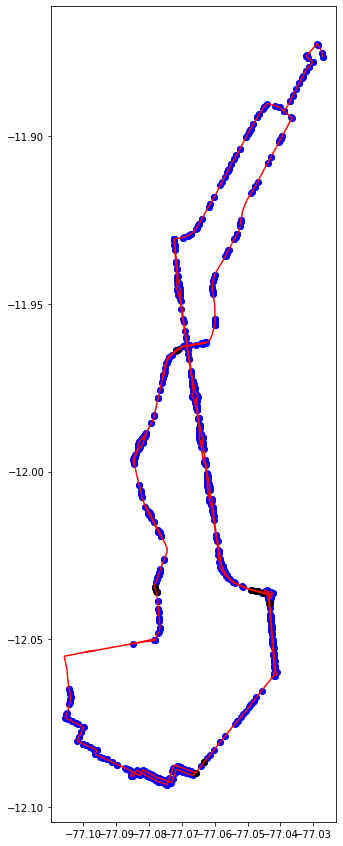

In [299]:
fig, ax = plt.subplots(figsize=(15,15))
edges[edges['osmid'] == 279007828].plot(ax=ax, color='black')
tmp.plot(ax=ax, color='r')
res.plot(ax=ax, color='b')
res.astype({'osmid':str}).sort_values('osmid').tail(10).plot(ax=ax, color='black')
# plt.show()

In [ ]:
res

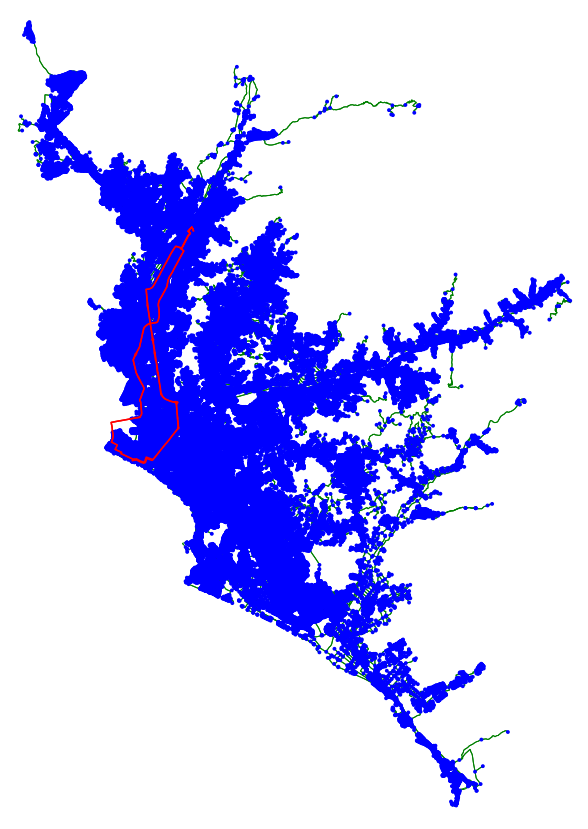

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [143]:
fig, ax = plt.subplots(figsize=(15,15))
tmp.plot(ax=ax, color='red')
ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', ax=ax)

# Amenities

In [37]:
%%time
amenitiesLima = pd.read_csv('LimaOSM/LimaAmenities.csv')
amenitiesLima['geometry'] = amenitiesLima['geometry'].apply(wkt.loads)
amenitiesLima = gpd.GeoDataFrame(amenitiesLima, crs='epsg:4326')
amenitiesLima.head()

<string>:2: DtypeWarning: Columns (5,6,7,11,12,13,14,16,17,18,19,20,21,23,24,25,26,27,29,30,31,34,43,44,45,46,47,48,49,50,51,52,53,54,55,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,2

CPU times: user 1.71 s, sys: 180 ms, total: 1.89 s
Wall time: 1.89 s


,unique_id,osmid,element_type,amenity,geometry_polygon,fee,wheelchair,wheelchair:description,addr:city,addr:housenumber,...,trolleybus,allotments,name:it,wikipedia:en,wikipedia:pl,wikipedia:sv,diesel,shortest_name,isPoint,geometry
0,node/1706421372,1706421372,node,bus_station,POINT (-76.90808560000001 -12.2550125),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90809 -12.25501)
1,node/1909452321,1909452321,node,toilets,POINT (-76.9071656 -12.2558628),no,no,No hay baño para silla de ruedas y encima tien...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90717 -12.25586)
2,node/1932465988,1932465988,node,townhall,POINT (-76.7734648 -12.4016275),NaN,NaN,NaN,Santa María del Mar,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.77346 -12.40163)
3,node/2477708419,2477708419,node,restaurant,POINT (-76.8284223 -12.3324731),NaN,limited,Tiene baño para silla de ruedas y buena atencion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82842 -12.33247)
4,node/2477757589,2477757589,node,restaurant,POINT (-76.8235383 -12.3382439),NaN,limited,No se si tiene baño para silla de ruedas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82354 -12.33824)


In [55]:
limaMapa = gpd.read_file("../Turismo/shapes/peru.shp")
limaMapa.head()

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,010103,BALSAS,BALSAS,0001,1,INEI,"POLYGON ((-77.93289 -6.69210, -77.92945 -6.692..."
1,01,AMAZONAS,0105,LUYA,010515,PROVIDENCIA,PROVIDENCIA,0001,1,INEI,"POLYGON ((-78.29830 -6.27144, -78.29813 -6.271..."
2,01,AMAZONAS,0105,LUYA,010504,COLCAMAR,COLCAMAR,0001,1,INEI,"POLYGON ((-78.03590 -6.27044, -78.03246 -6.270..."
3,01,AMAZONAS,0106,RODRIGUEZ DE MENDOZA,010603,COCHAMAL,COCHAMAL,0001,1,INEI,"POLYGON ((-77.61592 -6.32152, -77.61650 -6.322..."
4,01,AMAZONAS,0105,LUYA,010514,PISUQUIA,YOMBLON,0001,1,INEI,"POLYGON ((-78.04105 -6.39687, -78.04115 -6.397..."


<AxesSubplot:>

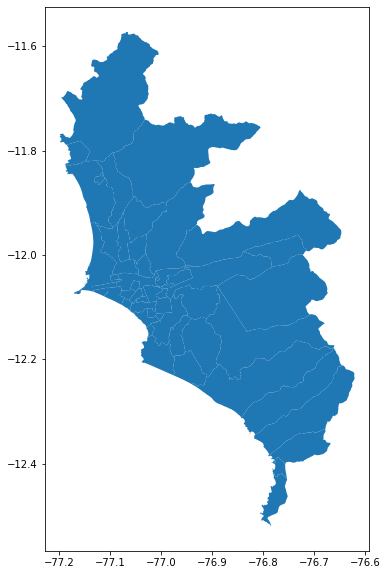

In [76]:
# limaMapa['departamen'].unique()
# limaMapa[limaMapa['departamen'] == 'CALLAO']['distrito'].unique()
limaMapa['LimaCallao'] = (limaMapa['provincia']=='LIMA') | (limaMapa['departamen']=='CALLAO')
limaMapa[limaMapa['LimaCallao']].plot(figsize=(10,10))

<AxesSubplot:>

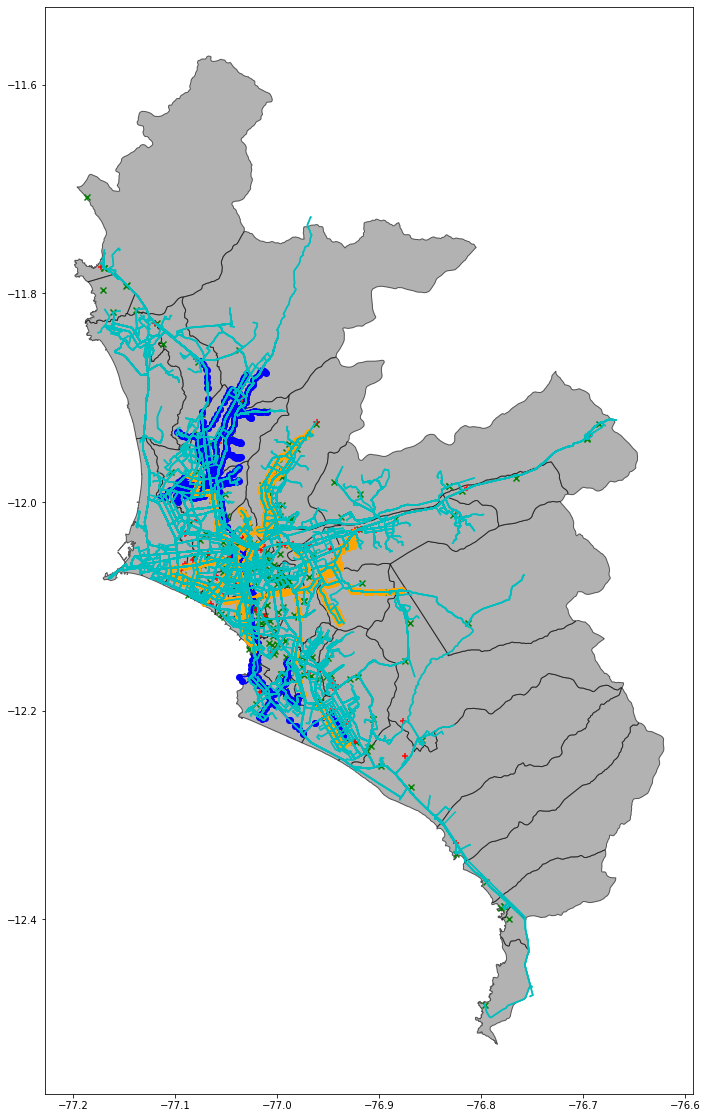

In [81]:
fig, ax = plt.subplots(figsize = (20,20))

# cond = (limaMapa['departamen'] == 'LIMA') & (limaMapa['departamen'] == 'CALLAO')
cond = limaMapa['LimaCallao']
limaMapa[cond].plot(ax=ax, alpha=0.6, color='gray', edgecolor='k')

cond = amenitiesLima['amenity'] == 'police'
police = amenitiesLima[cond]
police.plot(ax=ax, color='g', marker="x", label="Police")

cond = amenitiesLima['amenity'] == 'hospital'
hospital = amenitiesLima[cond]
hospital.plot(ax=ax, color='red', marker="+", label="Hospital")


rutascosac.plot(ax=ax, color='b', marker='o', label='Rutas cosac')
rutascorredores.plot(ax=ax, color='orange', marker='o', label='Rutas corredores')
rutastransportepublico.plot(ax=ax, color='c', marker='o', label='Rutas transporte público')


In [36]:
type(police)

pandas.core.frame.DataFrame

In [83]:
rutastransportepublico.head()

,name,geometry,geometry_layer,geometry_proj4
0,4306_Ida,MULTILINESTRING Z ((-76.89352 -12.01689 0.0000...,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
1,4306_Vuelta,MULTILINESTRING Z ((-77.01062 -12.03075 0.0000...,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
2,4303_Ida,MULTILINESTRING Z ((-77.01062 -12.03075 0.0000...,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
3,4303_Vuelta,MULTILINESTRING Z ((-76.89352 -12.01689 0.0000...,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
4,4884_Vuelta,MULTILINESTRING Z ((-76.86072 -12.11134 0.0000...,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs


In [86]:
import momepy

In [87]:
%%time
G = momepy.gdf_to_nx(rutastransportepublico, approach="primal")

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/momepy/utils.py:228: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


NotImplementedError: Multi-part geometries do not provide a coordinate sequence

In [84]:
graph = ox.graph_from_polygon(rutastransportepublico, network_type='drive')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().